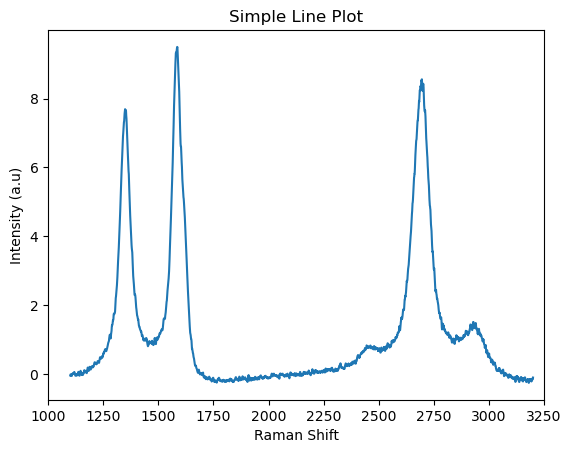

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import pandas as pd 

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


def multiple_peaks(x, *params):
  y = 0
  for i in range(0, len(params), 3):
    A, mu, sigma = params[i:i+3]  # Unpack parameters for each peak
    y += A * np.exp(-(x - mu)**2 / (2 * sigma**2))
  return y

# Load the data
file_path = "/Users/katerinachristofidou/Desktop/KRICT2024Hackathon/RamanTestData.csv" 
data = pd.read_csv(file_path)

# Display the first few rows
#print(df.head())

x = data.iloc[:, 0]
y = data.iloc[:, 1]

plt.plot(x, y)
plt.xlabel('Raman Shift')
plt.ylabel('Intensity (a.u)')
plt.title('Simple Line Plot')

# Plot limits 
plt.xlim(xmin=1000, xmax=3250)

plt.show()


In [63]:
y_smoothed = savgol_filter(y, window_length=51, polyorder=3)

# Find peaks in the entire dataset
peaks, _ = find_peaks(y_smoothed, prominence=0.05)  # Adjust prominence 
peak_positions = x[peaks]

#print(peak_positions)

# Create initial guesses for each peak
initial_guesses = []
for peak_position in peak_positions:
    initial_guesses.extend([np.max(y_smoothed[np.abs(x - peak_position) < 50]), peak_position, 10])

#print(initial_guesses)

# Check if initial guesses are empty
if not initial_guesses:
    print("No peaks detected. Please adjust the prominence threshold or check your data.")
   
#print("Number of parameters:", len(initial_guesses))


333     2929.50
610     2695.30
885     2453.65
1795    1583.37
2021    1348.98
Name: 3200.17, dtype: float64


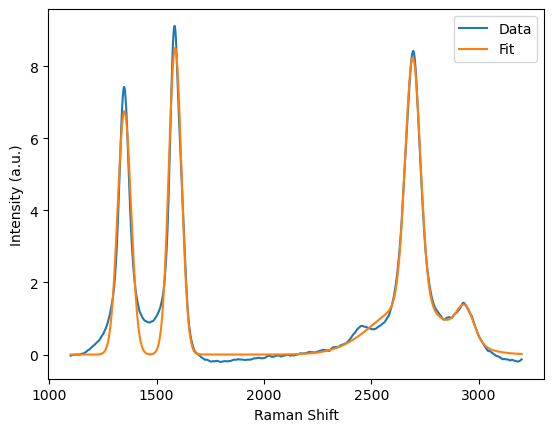

In [55]:
# Fit the multiple peaks
popt, pcov = curve_fit(multiple_peaks, x, y_smoothed, initial_guesses)

# Generate the fitted curve
y_fit = multiple_peaks(x, *popt)

# Plot the data and the fitted curve
plt.plot(x, y_smoothed, label='Data')
plt.plot(x, y_fit, label='Fit')
plt.xlabel('Raman Shift')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.show()

In [59]:
# Extract peak information (modify column names as needed)
peak_data = []
for i in range(len(popt) // 3):
    peak_data.append({
        "Peak Number": i + 1,
        "Center Raman Shift": popt[i*3 + 1],
        "Intensity Amplitude": popt[i*3],
        "Standard Deviation": popt[i*3 + 2]
    })

# Create a Pandas DataFrame
df = pd.DataFrame(peak_data)

# Print or save the DataFrame
df

,Peak Number,Center Raman Shift,Intensity Amplitude,Standard Deviation
0,1,2936.846576,0.903296,40.384668
1,2,2692.882719,6.839243,34.968958
2,3,2683.212750,1.401826,171.415532
3,4,1586.179166,8.509477,29.491377
4,5,1350.027131,6.753671,31.298590


In [61]:
integrated_intensities = []
for i in range(len(popt) // 3):
  A, mu, sigma = popt[i*3 : i*3+3]  # Extract parameters for each peak
  integrated_intensity = A * sigma * np.sqrt(2 * np.pi)
  integrated_intensities.append(integrated_intensity)

    # Add integrated intensities to the DataFrame
df['Integrated Intensity'] = integrated_intensities

# Print or save the DataFrame
df

,Peak Number,Center Raman Shift,Intensity Amplitude,Standard Deviation,Integrated Intensity
0,1,2936.846576,0.903296,40.384668,91.440021
1,2,2692.882719,6.839243,34.968958,599.488207
2,3,2683.212750,1.401826,171.415532,602.329682
3,4,1586.179166,8.509477,29.491377,629.053886
4,5,1350.027131,6.753671,31.298590,529.852067
